# Draw Word Cloud With Wikiepedia Document

- Import

In [1]:
!pip install --upgrade urllib3 chardet

Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: distro-info 0.23ubuntu1 has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of distro-info or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: python-debian 0.1.36ubuntu1 has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of python-debian or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [3]:
import gensim
import pprint
import numpy as np
import wikipediaapi
import re

from gensim import models
from gensim import corpora
from gensim.utils import simple_preprocess

- Create the Wikipedia Object

In [4]:
wiki_wiki = wikipediaapi.Wikipedia(
    user_agent='WikipediaAPITutorial (cogusp1@gmail.com)',
    language='en',
    # Format the extracted text
    extract_format=wikipediaapi.ExtractFormat.WIKI
)

### doc_list

- Creates an object for that page based on the title of the Wikipedia page

In [3]:
doc_list = []

page_py = wiki_wiki.page('Korea')
doc_list.append(page_py.text)

page_py = wiki_wiki.page('South_Korea')
doc_list.append(page_py.text)

page_py = wiki_wiki.page('North_Korea')
doc_list.append(page_py.text)

page_py = wiki_wiki.page('Korean_War')
doc_list.append(page_py.text)

page_py = wiki_wiki.page('Koreans')
doc_list.append(page_py.text)

page_py = wiki_wiki.page('Korean_language')
doc_list.append(page_py.text)

page_py = wiki_wiki.page('Korean')
doc_list.append(page_py.text)

page_py = wiki_wiki.page('List_of_Korean_flags')
doc_list.append(page_py.text)

page_py = wiki_wiki.page('Seoul')
doc_list.append(page_py.text)

page_py = wiki_wiki.page('Korea_under_Japanese_rule')
doc_list.append(page_py.text)

In [4]:
# doc_list
# ['A', 'B']

### page_py

- Get wikipedia page to string

In [98]:
page_py = (wiki_wiki.page('Korea')).text

page_py += (wiki_wiki.page('South_Korea')).text

page_py += (wiki_wiki.page('North_Korea')).text

page_py += (wiki_wiki.page('Korean_War')).text

page_py += (wiki_wiki.page('Koreans')).text

page_py += (wiki_wiki.page('Korean_language')).text

page_py += (wiki_wiki.page('Korean')).text

page_py += (wiki_wiki.page('List_of_Korean_flags')).text

page_py += (wiki_wiki.page('Seoul')).text

page_py += (wiki_wiki.page('Korea_under_Japanese_rule')).text

In [99]:
page_py = page_py.lower()

### Delete Stopword

In [100]:
import nltk

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from gensim.parsing.preprocessing import STOPWORDS

In [101]:
# Set the stop words
stop_words = set(stopwords.words('english')).union(set(STOPWORDS))
stop_words.add('th')
stop_words.add('korean')

##### Print

In [13]:
stop_words

{'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'ain',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amoungst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'aren',
 "aren't",
 'around',
 'as',
 'at',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'bill',
 'both',
 'bottom',
 'but',
 'by',
 'call',
 'can',
 'cannot',
 'cant',
 'co',
 'computer',
 'con',
 'could',
 'couldn',
 "couldn't",
 'couldnt',
 'cry',
 'd',
 'de',
 'describe',
 'detail',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'done',
 'down',
 'due',
 'during',
 'each',
 'eg',
 'eight',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'etc',
 'even

### remove stopwords

In [102]:
result_list = []

# split by space
word_tokens = word_tokenize(page_py)

for w in word_tokens:
    w = re.sub(r"[^\uAC00-\uD7A30-9a-zA-Z\s]", "", w)
    
    if w not in stop_words:
        if re.match('[a-z]+',  w):
            result_list.append(w)

##### Print

In [15]:
result_list

['korea',
 'korean',
 'romanized',
 'hanguk',
 'south',
 'korea',
 'chosn',
 'north',
 'korea',
 'peninsular',
 'region',
 'east',
 'asia',
 'divided',
 'near',
 'parallel',
 'known',
 'korean',
 'demilitarized',
 'zone',
 'states',
 'declared',
 'independence',
 'claiming',
 'sovereignty',
 'korea',
 'south',
 'korea',
 'republic',
 'korea',
 'comprising',
 'southern',
 'half',
 'north',
 'korea',
 'democratic',
 'people',
 'republic',
 'korea',
 'comprising',
 'northern',
 'half',
 'region',
 'consists',
 'korean',
 'peninsula',
 'jeju',
 'island',
 'minor',
 'islands',
 'near',
 'peninsula',
 'peninsula',
 'bordered',
 'china',
 'north',
 'russia',
 'northeast',
 'amnok',
 'duman',
 'rivers',
 'separated',
 'japan',
 'southeast',
 'korea',
 'strait',
 'radiocarbon',
 'dates',
 'paleolithic',
 'sites',
 'korea',
 'indicate',
 'human',
 'presence',
 'bc',
 'state',
 'emerge',
 'gojoseon',
 'fell',
 'han',
 'dynasty',
 'bc',
 'half',
 'millennium',
 'korea',
 'divided',
 'states',
 'go

### N-Gram

In [103]:
from gensim.models import Phrases
from gensim.models.phrases import Phraser

In [90]:
bigram_transgormer = Phrases([result_list])
bigram_phraser = Phraser(bigram_transgormer)

bigram_list = []

for b in bigram_phraser[result_list]:
    bigram_list.append(b)

In [104]:
bigram_list = []

def convert_to_list2(list):
    returnList = []
    for pair in list:
        combined = '_'.join(pair)
        returnList.append(combined)
    return returnList

bigram_list = convert_to_list2(list(nltk.bigrams(result_list)))

##### Print

In [93]:
bigram_list[0:100]

['korea',
 'romanized',
 'hanguk',
 'south_korea',
 'chosn',
 'north_korea',
 'peninsular',
 'region',
 'east_asia',
 'divided',
 'near',
 'parallel',
 'known',
 'demilitarized_zone',
 'states',
 'declared',
 'independence',
 'claiming',
 'sovereignty',
 'korea',
 'south_korea',
 'republic_korea',
 'comprising',
 'southern',
 'half',
 'north_korea',
 'democratic_people',
 'republic_korea',
 'comprising',
 'northern',
 'half',
 'region',
 'consists',
 'peninsula',
 'jeju',
 'island',
 'minor',
 'islands',
 'near',
 'peninsula',
 'peninsula',
 'bordered',
 'china',
 'north',
 'russia',
 'northeast',
 'amnok',
 'duman',
 'rivers',
 'separated',
 'japan',
 'southeast',
 'korea',
 'strait',
 'radiocarbon',
 'dates',
 'paleolithic',
 'sites',
 'korea',
 'indicate',
 'human',
 'presence',
 'bc',
 'state',
 'emerge',
 'gojoseon',
 'fell',
 'han',
 'dynasty',
 'bc',
 'half',
 'millennium',
 'korea',
 'divided',
 'states',
 'goguryeo_baekje',
 'silla',
 'known',
 'kingdoms',
 'korea',
 'late_cen

In [43]:
for phrase in bigram_phraser[result_list]:
    print(phrase)

romanized
hanguk
south
chosn
north
peninsular
region
east_asia
divided
near
parallel
known
demilitarized_zone
states
declared
independence
claiming
sovereignty
south
republic
comprising
southern
half
north
democratic_people
republic
comprising
northern
half
region
consists
peninsula
jeju
island
minor
islands
near
peninsula
peninsula
bordered
china
north
russia
northeast
amnok
duman
rivers
separated
japan
southeast
strait
radiocarbon
dates
paleolithic
sites
indicate
human
presence
bc
state
emerge
gojoseon
fell
han
dynasty
bc
half
millennium
divided
states
goguryeo_baekje
silla
known
kingdoms
late_century
silla
conquered
baekje
goguryeo
aid
tang
dynasty
drove
tang
sillatang
war
balhae
formed
goguryeo
remnants
mohe
people
succeeded
goguryeo
north
unified
silla
collapsed
states
civil_war
known
later_kingdoms
goguryeo
resurrected
goryeo
achieved
called
true
national
unification
historians
unified
later_kingdoms
succeeded
unifying
successor
states
goguryeo
crown_prince
balhae
ruling
class
fl

### Get TF-IDF Weights

In [113]:
doc_tokenized = [simple_preprocess(doc) for doc in bigram_list]
dictionary = corpora.Dictionary()
BoW_corpus = [dictionary.doc2bow(doc, allow_update=True) for doc in doc_tokenized]

tfidf = models.TfidfModel(BoW_corpus, smartirs='ntc')

### Dictionary

- Save as dictionary

In [114]:
word_dict = {}

for doc in tfidf[BoW_corpus]:
    for id, freq in doc:
        word_dict[dictionary[id]] = np.around(freq, decimals=2)

In [33]:
# word_dict
# {"a": 0.0, "b": 0.1}

In [115]:
word_freq = {}

for doc in BoW_corpus:
    for id, freq in doc:
        word = dictionary[id]
        if word in word_freq:
            word_freq[word] += freq
        else:
            word_freq[word] = freq

- Sort a dictionary by value

In [108]:
import operator

- Print TF-IDF Weight

In [116]:
result_dict = sorted(word_dict.items(), key=operator.itemgetter(1), reverse=True)

# Get first 50 items in dictionary
result_dict[:50]

[('korea_romanized', 1.0),
 ('hanguk_south', 1.0),
 ('south_korea', 1.0),
 ('korea_chosn', 1.0),
 ('chosn_north', 1.0),
 ('north_korea', 1.0),
 ('region_east', 1.0),
 ('east_asia', 1.0),
 ('asia_divided', 1.0),
 ('divided_near', 1.0),
 ('near_parallel', 1.0),
 ('parallel_known', 1.0),
 ('zone_states', 1.0),
 ('states_declared', 1.0),
 ('korea_south', 1.0),
 ('korea_republic', 1.0),
 ('republic_korea', 1.0),
 ('southern_half', 1.0),
 ('half_north', 1.0),
 ('people_republic', 1.0),
 ('northern_half', 1.0),
 ('half_region', 1.0),
 ('region_consists', 1.0),
 ('peninsula_jeju', 1.0),
 ('jeju_island', 1.0),
 ('island_minor', 1.0),
 ('minor_islands', 1.0),
 ('islands_near', 1.0),
 ('near_peninsula', 1.0),
 ('bordered_china', 1.0),
 ('china_north', 1.0),
 ('north_russia', 1.0),
 ('northeast_amnok', 1.0),
 ('amnok_duman', 1.0),
 ('duman_rivers', 1.0),
 ('separated_japan', 1.0),
 ('japan_southeast', 1.0),
 ('southeast_korea', 1.0),
 ('korea_strait', 1.0),
 ('sites_korea', 1.0),
 ('korea_indicate

- Print TF-IDF Frequency

In [117]:
result_freq = sorted(word_freq.items(), key=operator.itemgetter(1), reverse=True)

# Get first 50 items in dictionary
result_freq[:50]

[('south_korea', 391),
 ('north_korea', 333),
 ('united_states', 102),
 ('soviet_union', 54),
 ('world_war', 51),
 ('war_ii', 46),
 ('republic_korea', 45),
 ('kim_il', 44),
 ('il_sung', 44),
 ('kim_jong', 43),
 ('north_south', 33),
 ('east_asia', 31),
 ('korea_south', 31),
 ('united_nations', 30),
 ('north_koreans', 27),
 ('japanese_rule', 26),
 ('joseon_dynasty', 24),
 ('human_rights', 23),
 ('jong_il', 23),
 ('korea_japan', 22),
 ('nuclear_weapons', 19),
 ('korea_north', 19),
 ('wayback_machine', 19),
 ('people_republic', 18),
 ('south_koreans', 18),
 ('han_river', 17),
 ('ethnic_koreans', 17),
 ('south_film', 17),
 ('kingdoms_korea', 15),
 ('comfort_women', 15),
 ('air_force', 15),
 ('korea_japanese', 15),
 ('c_f', 14),
 ('eighth_army', 14),
 ('late_century', 13),
 ('civil_war', 13),
 ('east_asian', 13),
 ('korea_war', 13),
 ('japanese_army', 13),
 ('syngman_rhee', 12),
 ('korea_country', 12),
 ('air_quality', 12),
 ('pusan_perimeter', 12),
 ('phase_offensive', 12),
 ('million_peopl

### Draw Word Cloud

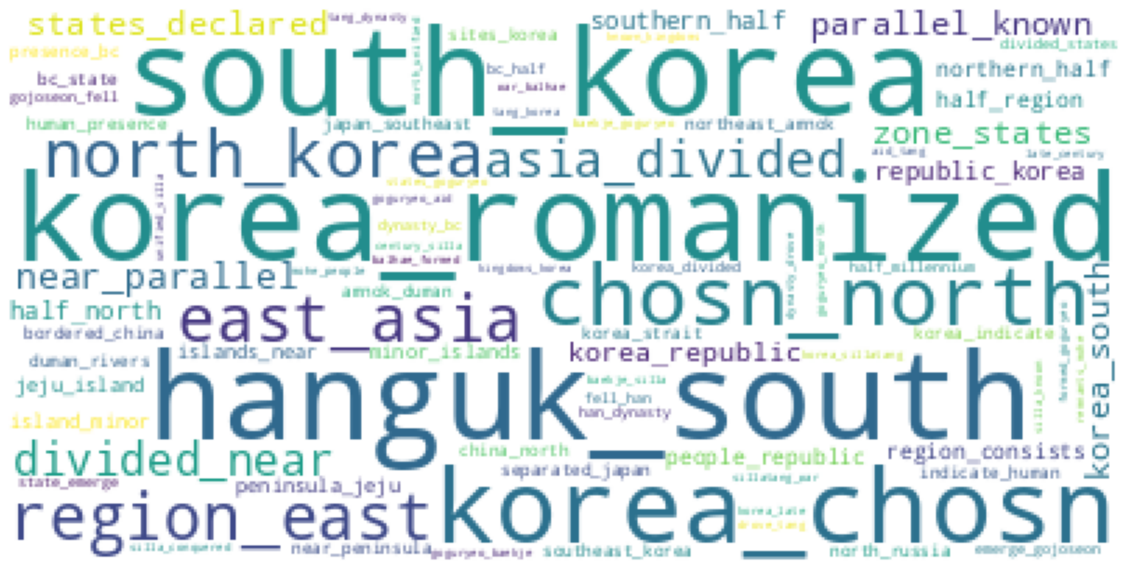

In [118]:
import matplotlib.pyplot as plt

from wordcloud import WordCloud

wordcloud = WordCloud(background_color='white').generate_from_frequencies(word_dict)

# Set figure size
plt.figure(figsize=(20,20))

# Display image
plt.imshow(wordcloud)

# No axis details
plt.axis("off")
plt.savefig("word_cloud.png", format="png")
plt.show()

Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: distro-info 0.23ubuntu1 has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of distro-info or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: python-debian 0.1.36ubuntu1 has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of python-debian or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
